<a href="https://colab.research.google.com/github/nayeer1169/GRIP_Tasks/blob/main/TASK/Iris_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clusters for Iris-Dataset


Made By - Nayeer Naushad

###Importing Libraries

In [17]:
#for manipulating the Dataset
import pandas as pd

#for working on the data
import numpy as np

#for visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

#to find number of given clusters
from sklearn.cluster import KMeans

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<!-- Data Preprocessing -->

###Data Preprocessing

In [18]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


this datset has only float values.



In [20]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

we have 3 species of flowers in the given dataset.



In [21]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

This is a clean dataset with no outliers or null values.



###Clustering
I am using the elbow graph to find out the optimum number of clusters



In [33]:
X = data.iloc[:, [0,1,2,3]].values

def cluster(data):
    wcss = []
    for i in range(1,11):
      kmeans = KMeans(n_clusters=i, init='k-means++', random_state=30)
      kmeans.fit(X)
      wcss.append(kmeans.inertia_)
    
    sns.set()
    plt.plot(range(1,11), wcss)
    plt.title("Elbow graph")
    plt.show()
     

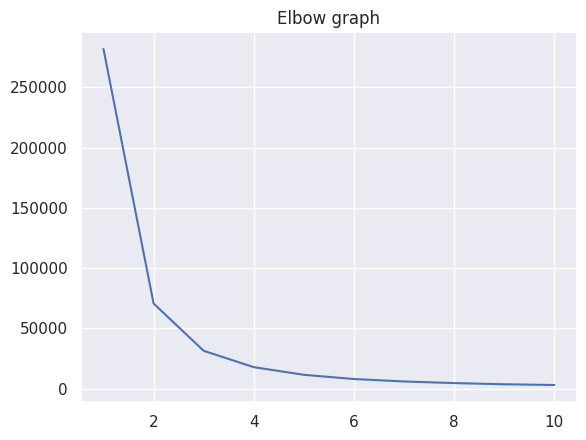

In [34]:
cluster(data)  

We can clearly see that the optimum number of clusters is 3

In [35]:
kmeans = KMeans(n_clusters=3 , init='k-means++', random_state=0)
Y = kmeans.fit_predict(X)

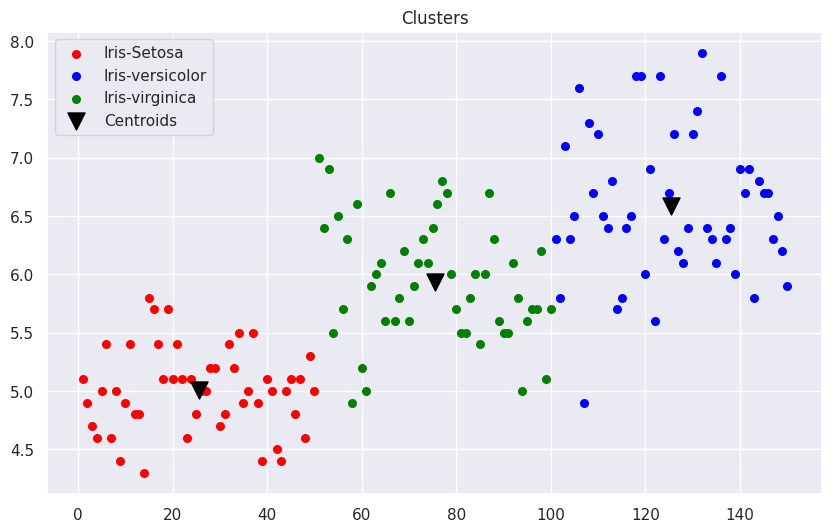

In [40]:
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0,0], X[Y==0,1], s=30, c='red', label="Iris-Setosa")
plt.scatter(X[Y==1,0], X[Y==1,1], s=30, c='blue', label="Iris-versicolor")
plt.scatter(X[Y==2,0], X[Y==2,1], s=30, c='green', label="Iris-virginica")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c="black", marker='v', label='Centroids')
plt.title("Clusters")
plt.legend()